In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('df_post_clustering.csv')

In [5]:
df.head(3)

,zipcode,cluster_label,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,92131,1,House,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",...,9.850000,9.750000,9.750000,9.775000,0,1,0,strict_14_with_grace_period,0,0
1,92037,3,Apartment,Entire home/apt,1,2.0,2.0,3.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",...,10.000000,10.000000,10.000000,10.000000,0,1,0,strict_14_with_grace_period,0,0
2,92109,1,Townhouse,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",...,9.853496,9.834812,9.875694,9.457778,0,1,0,flexible,0,0


## Cluster Distribution

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8536\3232177695.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


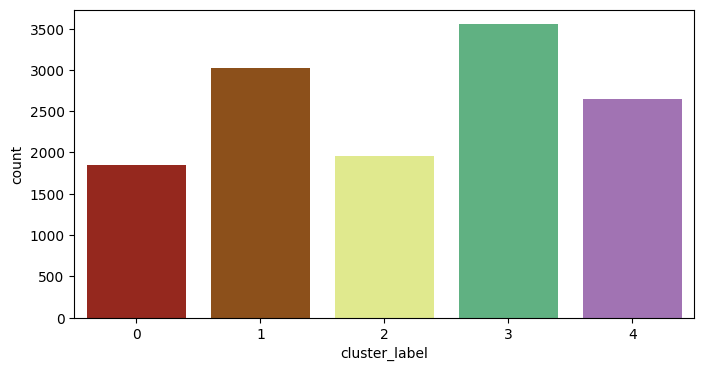

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

my_palette = ['#A9180A', '#9F4F08', '#ECF87F', '#52BE80', '#A569BD']

plt.figure(figsize=(8,4))

sns.countplot(
    data=df, 
    x='cluster_label',
    palette=my_palette 
)
plt.show()

## Distribution of cluster based on room type

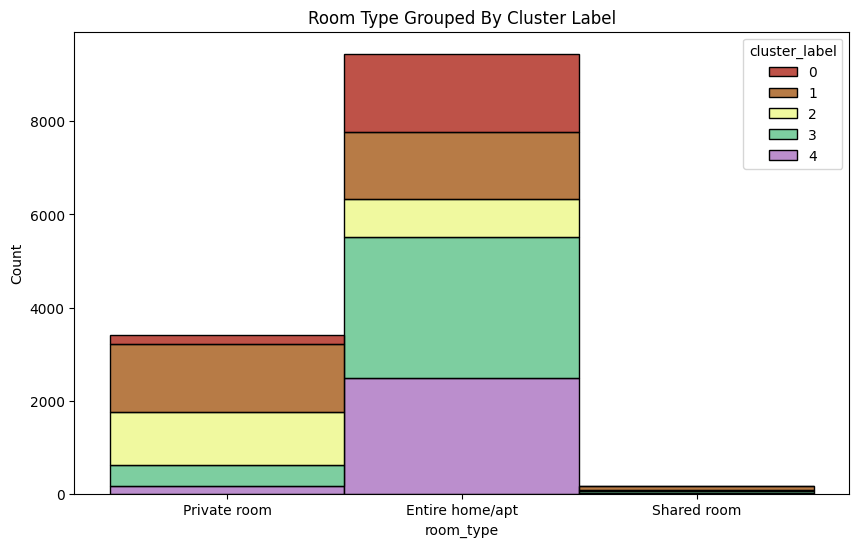

In [10]:
fig, axes = plt.subplots(figsize=(10,6))

ax = sns.histplot(data=df, 
             x='room_type', 
             hue='cluster_label', palette = my_palette,
             multiple="stack").set(title='Room Type Grouped By Cluster Label')

plt.show()

## Review score rating

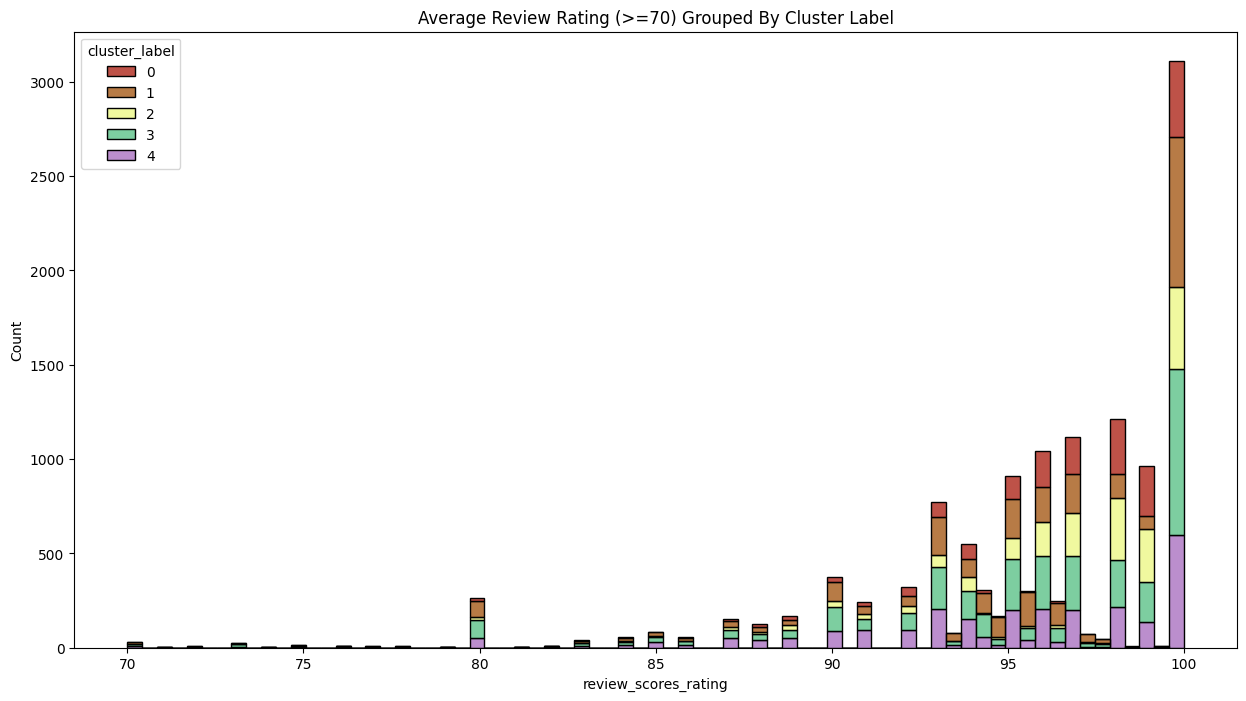

In [11]:
fig, axes = plt.subplots(figsize=(15,8))

greater_than_70 = df[df['review_scores_rating'] >= 70]

ax = sns.histplot(data=greater_than_70, 
             x='review_scores_rating', 
             hue='cluster_label', palette = my_palette,
             multiple="stack").set(title='Average Review Rating (>=70) Grouped By Cluster Label')

plt.show()

## Box plot for price per stay

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8536\2896653565.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = less_than_2000['cluster_label'],


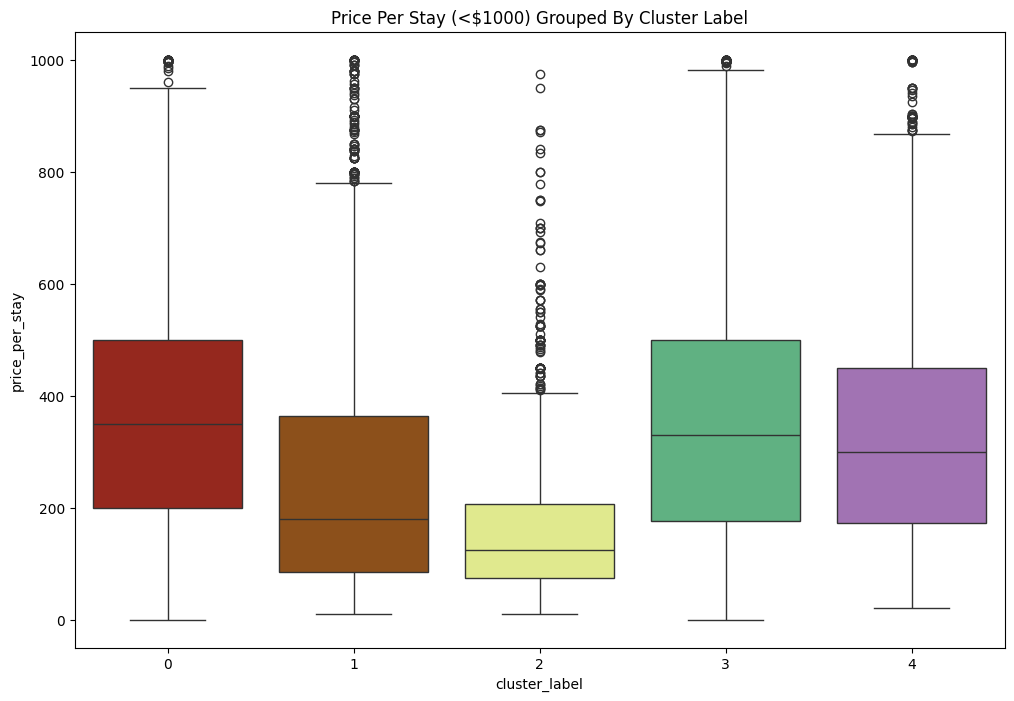

In [12]:
fig, axes = plt.subplots(figsize=(12,8))

# create a filter of less than $1000 for price per stay to remove outliers
less_than_2000 = df[df['price_per_stay'] <= 1000]

sns.boxplot(x = less_than_2000['cluster_label'], 
            y = less_than_2000['price_per_stay'], 
            palette = my_palette).set(title='Price Per Stay (<$1000) Grouped By Cluster Label')

plt.show()

## Property Types

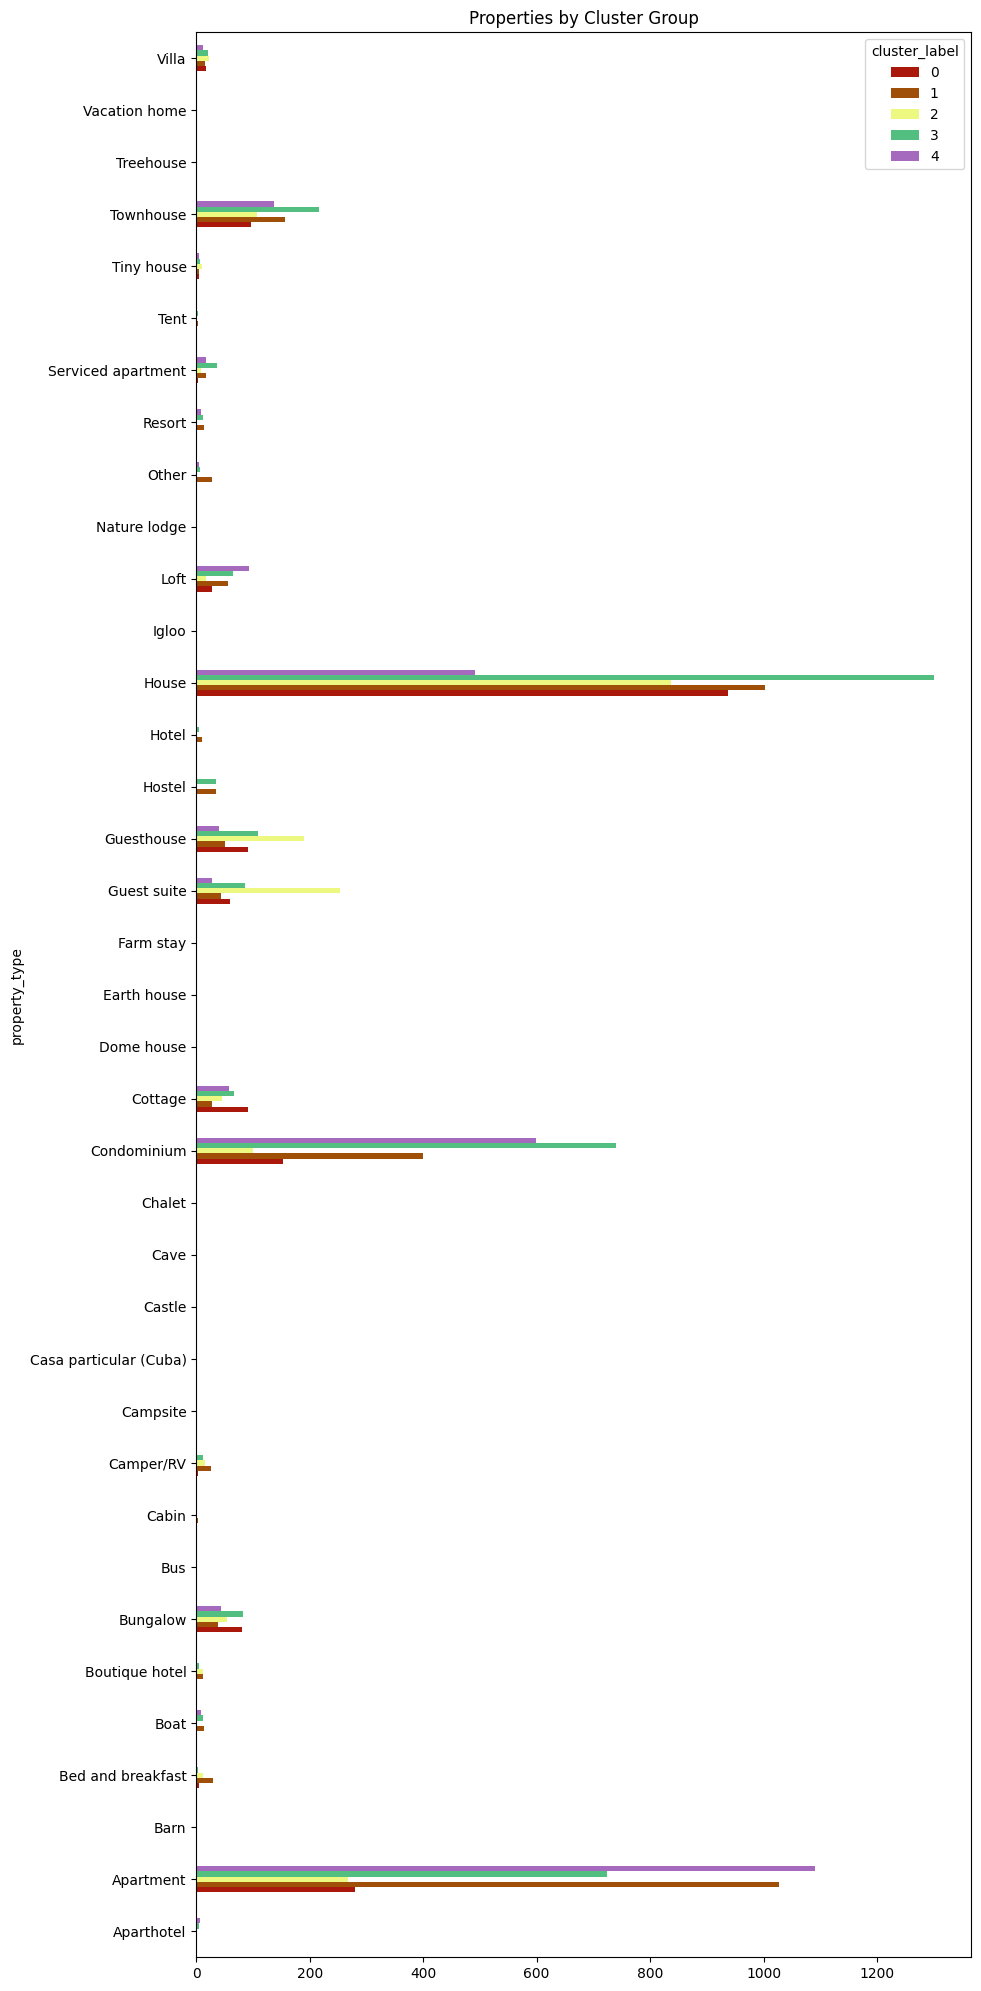

In [17]:
df.groupby(['property_type', 'cluster_label']).size().unstack(fill_value=0).plot.barh(figsize=(10,25), 
                                                                                                 color = my_palette)

plt.title('Properties by Cluster Group')
plt.show()